In [1]:
#Packages
import time
import numpy as np
import h5py
import matplotlib as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v3 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

In [3]:
#Dataset
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 0. It's a non-cat picture.


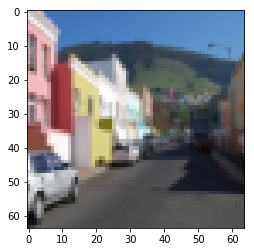

In [4]:
#Example of a picture
index = 1
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " +
      classes[train_y[0,index]].decode("utf-8") +
      " picture.")

In [5]:
#Explore dataset
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print("Number of training examples: " + str(m_train))
print("Number of testing examples: " + str(m_test))
print("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print("train_x_orig shape: " + str(train_x_orig.shape))
print("train_y sahpe: " + str(train_y.shape))
print("test_x_orig shape: " + str(test_x_orig.shape))
print("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y sahpe: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [7]:
#Reshape the training and test examples
# The "-1" makes reshape flatten the remaining dimensions
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

#Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print("train_x's shape: " + str(train_x.shape))
print("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [11]:
# Constants defining the model
n_x = 12288 #num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [36]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, 
                   num_iterations = 3000, print_cost=False):
    
    np.random.seed(1)
    grads = {}
    costs = [] #to keep track of the cost
    m = X.shape[1] # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    #Initialize paramater
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    #Get W1, b1, W2, b2 from the parameters of dictionary
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    #Loop (gradient descent)
    for i in range(0, num_iterations):
        
        #Forward propagation: lINEAR - RELU - LINEAR - SIGMOID
        #Inputs: "X, W1, b1, W2, b2". Output: "A1, chacel, A2, cache2"
        A1, cache1 = linear_activation_forward(X, W1, b1, activation = "relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation = "sigmoid")
        
        #Compute cost
        cost = compute_cost(A2, Y)
        
        #Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        #Backward prpagation. Inputs: "dA2, cache2, cache1".
        #Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1"
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation = "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation = "relu")
        
        #Set grads
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        #Update parameter
        parameters = update_parameters(parameters, grads, learning_rate)
        
        #Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        #Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
    
    #plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters
    



Cost after iteration 0: 0.693049735659989
Cost after iteration 100: 0.6464320953428849
Cost after iteration 200: 0.6325140647912678
Cost after iteration 300: 0.6015024920354665
Cost after iteration 400: 0.5601966311605747
Cost after iteration 500: 0.5158304772764729
Cost after iteration 600: 0.4754901313943325
Cost after iteration 700: 0.43391631512257495
Cost after iteration 800: 0.4007977536203887
Cost after iteration 900: 0.35807050113237976
Cost after iteration 1000: 0.33942815383664127
Cost after iteration 1100: 0.30527536361962654
Cost after iteration 1200: 0.2749137728213016
Cost after iteration 1300: 0.24681768210614846
Cost after iteration 1400: 0.19850735037466097
Cost after iteration 1500: 0.17448318112556657
Cost after iteration 1600: 0.1708076297809689
Cost after iteration 1700: 0.11306524562164715
Cost after iteration 1800: 0.09629426845937145
Cost after iteration 1900: 0.08342617959726863
Cost after iteration 2000: 0.07439078704319078
Cost after iteration 2100: 0.0663074

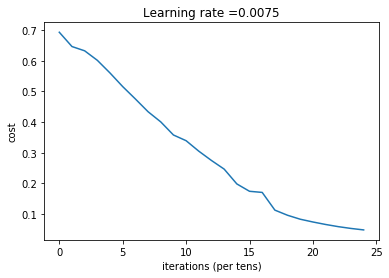

In [37]:
params = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), learning_rate = 0.0075,num_iterations= 2500, print_cost=True)

In [38]:
predictions_train = predict(train_x, train_y, params)

Accuracy: 0.9999999999999998


In [39]:
predictions_test = predict(test_x, test_y, params)

Accuracy: 0.72


In [40]:
# Constants
layers_dims = [12288, 20, 7, 5, 1] #4 layer

In [41]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, 
                   num_iterations = 3000, print_cost=False):
    
    np.random.seed(1)
    costs = []
    
    parameters = initialize_parameters_deep(layers_dims)
    
    #Loop (gradient descent)
    for i in range(0, num_iterations):
        
        #Forward propagation
        AL, caches = L_model_forward(X, parameters)
        
        #compute cost
        cost = compute_cost(AL, Y)
        
        #backward propagation
        grads = L_model_backward(AL, Y, caches)
        
        #Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)
        
        #Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    #plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.771749
Cost after iteration 100: 0.672053
Cost after iteration 200: 0.648263
Cost after iteration 300: 0.611507
Cost after iteration 400: 0.567047
Cost after iteration 500: 0.540138
Cost after iteration 600: 0.527930
Cost after iteration 700: 0.465477
Cost after iteration 800: 0.369126
Cost after iteration 900: 0.391747
Cost after iteration 1000: 0.315187
Cost after iteration 1100: 0.272700
Cost after iteration 1200: 0.237419
Cost after iteration 1300: 0.199601
Cost after iteration 1400: 0.189263
Cost after iteration 1500: 0.161189
Cost after iteration 1600: 0.148214
Cost after iteration 1700: 0.137775
Cost after iteration 1800: 0.129740
Cost after iteration 1900: 0.121225
Cost after iteration 2000: 0.113821
Cost after iteration 2100: 0.107839
Cost after iteration 2200: 0.102855
Cost after iteration 2300: 0.100897
Cost after iteration 2400: 0.092878


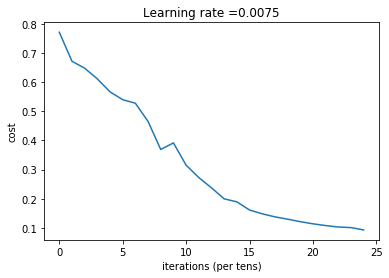

In [42]:
params1 = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500,
                       print_cost = True)

In [43]:
pred_train = predict(train_x, train_y, params1)

Accuracy: 0.9856459330143539


In [44]:
pred_test = predict(test_x, test_y, params1)

Accuracy: 0.8


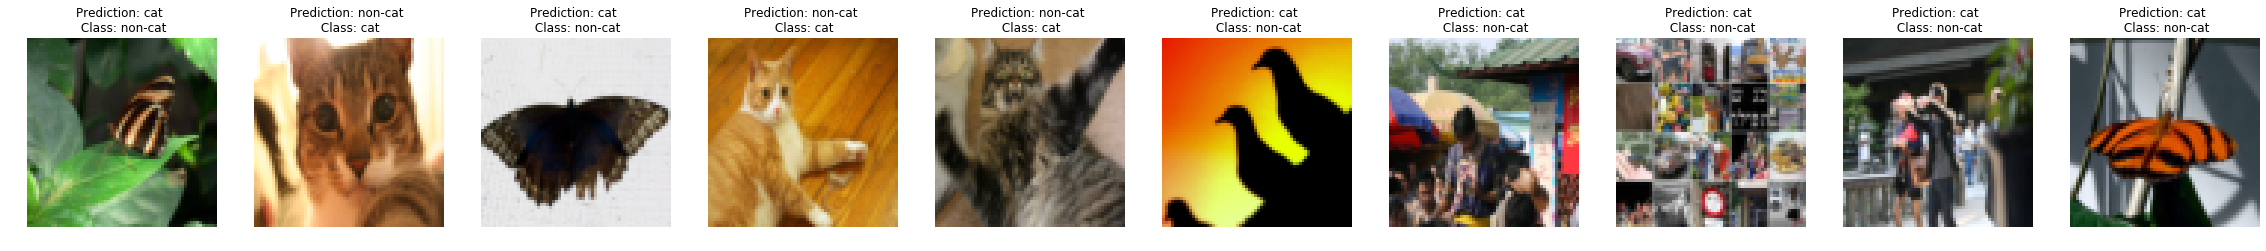

In [45]:
print_mislabeled_images(classes, test_x, test_y, pred_test)

In [49]:
import imageio

Accuracy: 0.0
y = 0.0, your L-layer model predicts a "non-cat" picture.


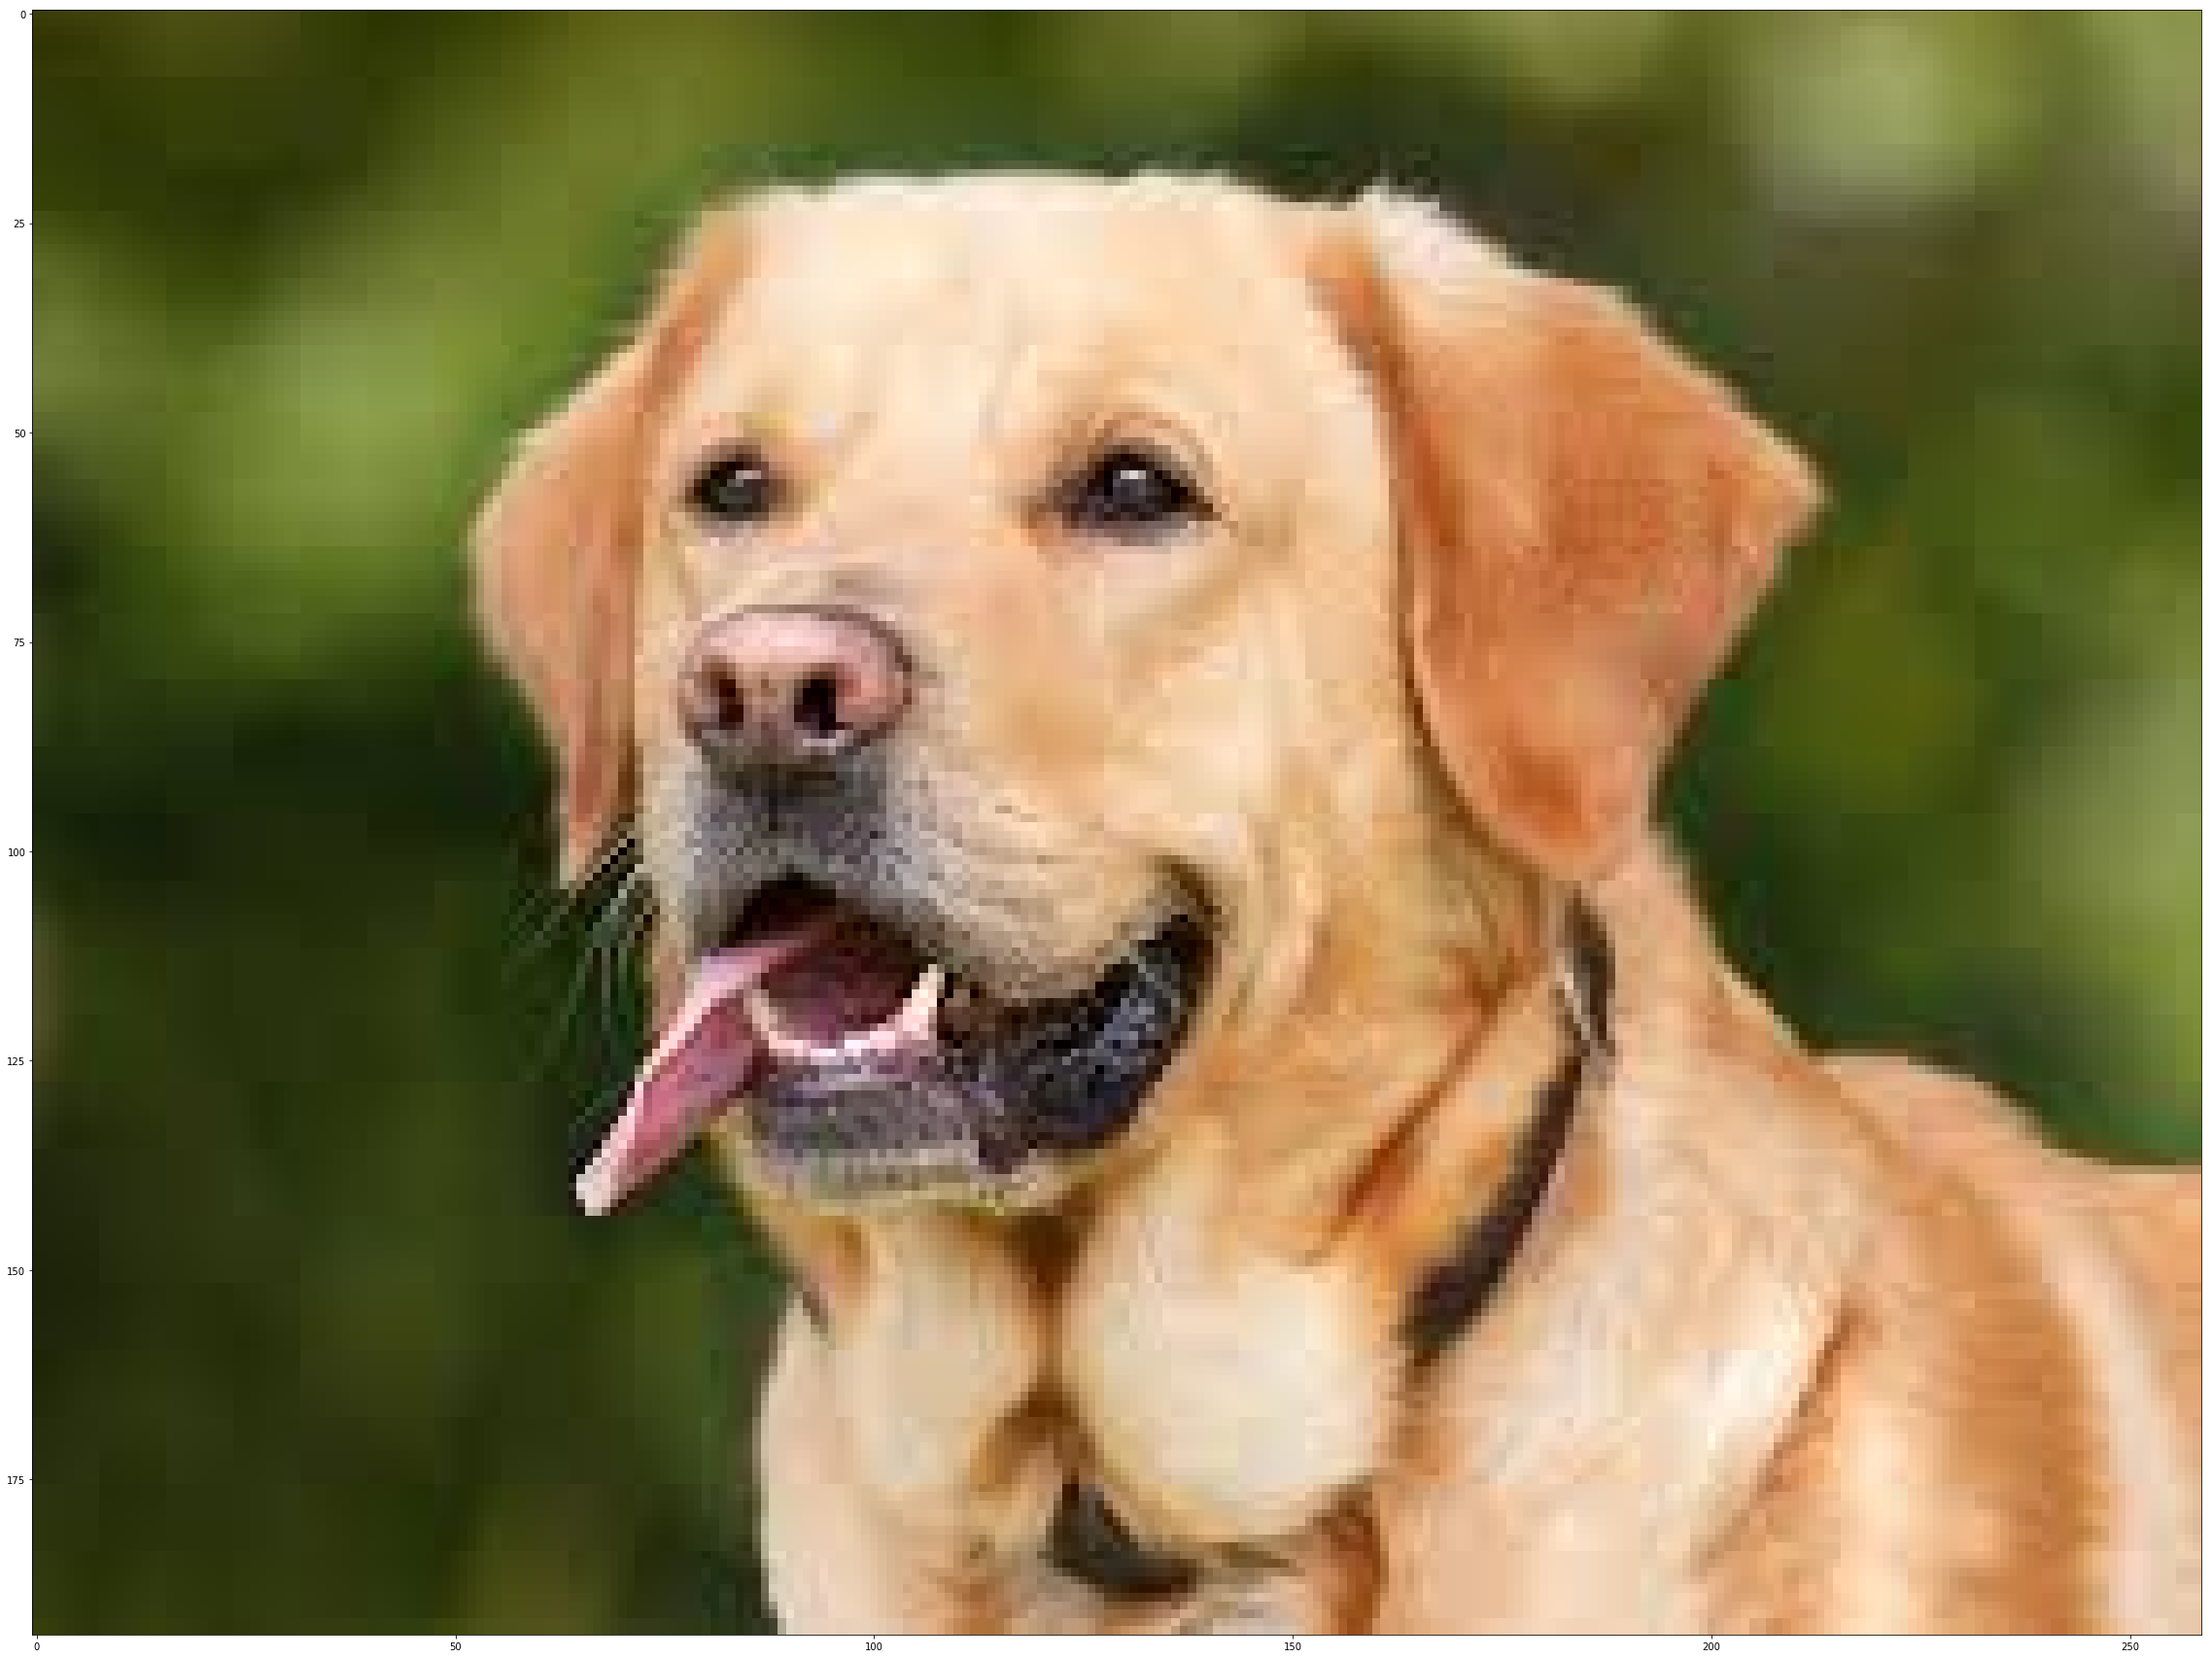

In [50]:
my_image = "my_image.jpg"
my_label_y = [1]

fname = 'images/' + my_image
image = imageio.imread(fname)
my_image = np.array(Image.fromarray(image).resize((64,64))).reshape((num_px*num_px*3,1))
my_image = my_image/255.
my_predicted_image = predict(my_image, my_label_y, parameters)

plt.imshow(image)
print("y = " +str(np.squeeze(my_predicted_image)) +
     ", your L-layer model predicts a \"" +
     classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") + "\" picture.")